# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï ÌôïÎ•†Î∂ÑÌè¨

- Ïó∞ÏÜçÌòï ÌôïÎ•†Î∂ÑÌè¨


    - Ï†ïÍ∑úÎ∂ÑÌè¨(normal distribution)
        - ÎåÄÌëúÎ≥∏ Î™®ÏßëÎã®Ïùò Ìï©, ÌèâÍ∑† Ï∂îÎ°† Ïãú ÌôúÏö©
    - t-Î∂ÑÌè¨
        - ÏÜåÌëúÎ≥∏ Î™®ÏßëÎã® ÌèâÍ∑† Ï∂îÎ°† Ïãú ÌôúÏö©
        - ÏÑ†ÌòïÎ™®Ìòï ÌöåÍ∑ÄÍ≥ÑÏàò Ï∂îÎ°†(Ï¢ÖÏÜçÎ≥ÄÏàò Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ï)Ïãú ÌôúÏö©
    - Ïπ¥Ïù¥Ï†úÍ≥±(œá2)Î∂ÑÌè¨
        - Î™®ÏßëÎã® Î∂ÑÏÇ∞ Ï∂îÎ°† Ïãú(Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ï) ÌôúÏö©
        - Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï Ïãú ÌôúÏö©
    - F-Î∂ÑÌè¨
        - Îëê Î™®ÏßëÎã® Î∂ÑÏÇ∞ Ï∞®Ïù¥ ÎπÑÍµê Ïãú ÌôúÏö©(Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ÄÏ†ï)
        - Î∂ÑÏÇ∞Î∂ÑÏÑù Ïãú ÌôúÏö©
        - (ÏÑ§Î™ÖÌïòÎäî Î≥ÄÎèô/ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌïòÎäî Î≥ÄÎèô)Ïù¥ FÎ∂ÑÌè¨Î•º Îî∞Î¶Ñ


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [46]:
#ÌïúÍ∏ÄÎ¨∏Ï†ú Î∞úÏÉù
#matplotlibÏùò Í∏∞Î≥∏Ìè∞Ìä∏ÏóêÏÑú ÌïúÍ∏ÄÏßÄÏõê Ìè∞Ìä∏Í∞Ä ÏóÜÏùå
#Ìå®ÌÇ§ÏßÄÏùò Ìè∞Ìä∏Î•º Ï∂îÍ∞ÄÌïòÍ≥† ÏÇ¨Ïö©

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # Îß•OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # ÏúàÎèÑÏö∞
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [47]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

## Ï†ïÍ∑úÎ∂ÑÌè¨

- Í∞ÄÏû• ÎåÄÌëúÏ†ÅÏù∏ Î∂ÑÌè¨
- Í∞ÄÏö∞ÏßÄÏïà(Gaussian) Î∂ÑÌè¨ÎùºÍ≥†ÎèÑ Î∂àÎ¶¨ÏõÄ
- Ïó∞ÏÜçÌòï ÌôïÎ•†Î≥ÄÏàòÏóê ÎåÄÌïú Î∂ÑÌè¨
- ÌèâÍ∑†(Œº)Í≥º ÌëúÏ§ÄÌé∏Ï∞®(œÉ)Î°ú Î™®ÏñëÏù¥ Í≤∞Ï†ï
- Ï¢åÏö∞ÎåÄÏπ≠, Ï¢ÖÎ™®Ïñë
- Ï§ëÏïô Ìïú Ï†êÏù¥ Îæ∞Ï°±
- ÌèâÍ∑† = Ï§ëÏïôÍ∞í = ÏµúÎπàÍ∞í
- ÏûêÏó∞Í≥Ñ, ÏÇ¨ÌöåÌòÑÏÉÅÏóê ÎßéÏù¥ ÎÇòÌÉÄÎÇ®

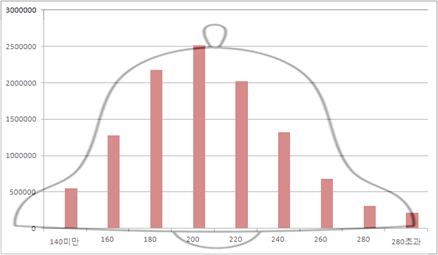

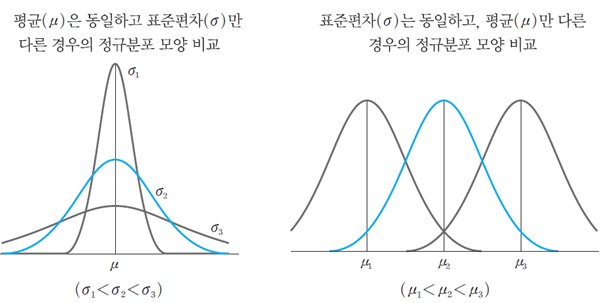

### Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò f(x)  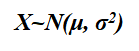
- Ïó∞ÏÜçÌôïÎ•†Î≥ÄÏàò

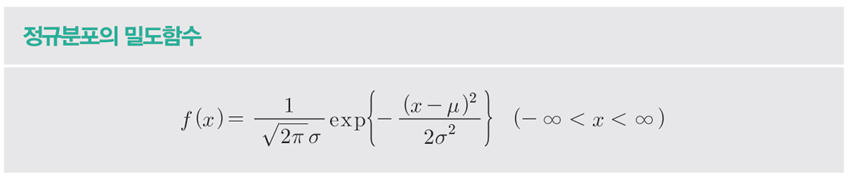

In [48]:
# mu : ÌèâÍ∑†, sigma : ÌëúÏ§ÄÌé∏Ï∞®
def N(mu, sigma) :
    x_range = [-np.inf, np.inf]
    def f(x) :
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f


In [49]:
mu, sigma = 2, 0.5
X = N(mu,sigma)

In [50]:
# Î∂ÑÏÇ∞ÏùÄ ÌëúÏ§ÄÌé∏Ï∞® 0.5Ïùò Ï†úÍ≥±
check_prob(X)

expected vaue 2.000
variance 0.250


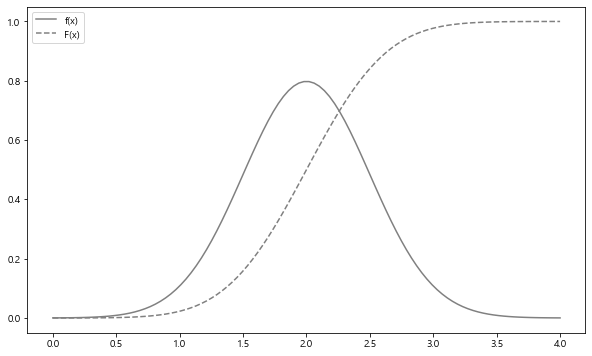

In [51]:
# XÎäî ÌèâÍ∑†Ïù¥ 2 ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 0.5Ïùº Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Îäî ÌôïÎ•†Î≥ÄÏàò
plot_prob(X,0,4)

- ÎÇ®Ïûê Í≥†Îì±ÌïôÏÉù ÌÇ§Ïùò ÌèâÍ∑†Ïù¥ 170cm Ïù¥Í≥† ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 5cmÎùºÎ©¥, Ïö∞Ïó∞Ìûà ÎßåÎÇú ÎÇ®Ïûê Í≥†Îì±ÌïôÏÉùÏùò ÌÇ§Îäî N(170,5)Î•º Îî∞Î•∏Îã§Í≥† Ìï† Ïàò ÏûàÎã§.



- ÎÇ®Ïûê Í≥†Îì±ÌïôÏÉùÏùò ÌÇ§ ~ N(170, 5)


- Ïù¥ ÏÇ¨Ïã§ÏùÑ Î∞îÌÉïÏúºÎ°ú Ïö∞Ïó∞Ìûà ÎßåÎÇú ÎÇ®Ïûê Í≥†Îì±ÌïôÏÉùÏùò ÌÇ§Í∞Ä 165cm Ïù¥ÏÉÅ 175cm Ïù¥ÌïòÏùº ÌôïÎ•†ÏùÄ


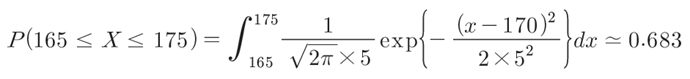

In [52]:
def N(mu,sigma) :
    x_range = [165,175]
    def f(x) :
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [53]:
mu, sigma = 170, 5
X = N(mu, sigma)


In [54]:
x_range, f = X
np.round(integrate.quad(f, x_range[0],x_range[1])[0],6) # Íµ¨Í∞ÑÏùÑ ÏûëÍ≤å ÎÇòÎàÑÍ≥† ÏàòÏπòÏ†ëÍ∑º

0.682689

- Î™®ÏùòÍ≥†ÏÇ¨ ÌèâÍ∑† Ï†êÏàòÍ∞Ä 70Ï†êÏù¥Í≥† ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 8Ï†êÏù¥ÎùºÎ©¥, Ïö∞Ïó∞Ìûà ÎßåÎÇú ÌïôÏÉùÏùò Ï†êÏàòÍ∞Ä N(70, 8^2)Î•º Îî∞Î•∏Îã§Í≥† Ìï† Ïàò ÏûàÎã§.


- Î™®ÏùòÍ≥†ÏÇ¨ Ï†êÏàò ~ N(70, 8^2)


- Ïù¥ ÏÇ¨Ïã§ÏùÑ Î∞îÌÉïÏúºÎ°ú Ïö∞Ïó∞Ìûà ÎßåÎÇú ÌïôÏÉùÏùò Ï†êÏàòÍ∞Ä 54Ï†ê Ïù¥ÏÉÅ 86Ï†ê Ïù¥ÌïòÏùº ÌôïÎ•†ÏùÄ?



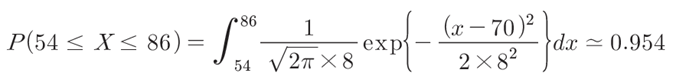

In [55]:
def N(mu,sigma) :
    x_range = [54,86]
    def f(x) :
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [56]:
mu, sigma = 70, 8
X = N(mu,sigma)

x_range, f = X
np.round(integrate.quad(f, x_range[0],x_range[1])[0],6)

0.9545

### scipy.state ÏÇ¨Ïö©Ìï¥ÏÑú ÌôïÏù∏

In [57]:
# norm()
# Í∏∞ÎåìÍ∞íÏù¥ 2Ïù¥Í≥† ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 0.5Ïù∏ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Îäî ÌôïÎ•†Î≥ÄÏàò ÏÉùÏÑ±
rv = stats.norm(2,0.5)

In [58]:
# ÌôïÎ•†Î≥ÄÏàòÏùò ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞
# mean(), var()
rv.mean(), rv.var()

(2.0, 0.25)

In [59]:
# pdf : Ïó∞ÏÜç ÌôïÎ•†Î≥ÄÏàòÏùò ÌôïÎ•† Î∞ÄÎèÑ Ìï®Ïàò
rv.pdf(2)
# Ïó∞ÏÜç ÌôïÎ•†Î≥ÄÏàòÏù¥ÎØÄÎ°ú Î∞úÏÉùÍ∞íÏù¥ 2Ïùº ÌôïÎ•†Ïù¥ Í≥ÑÏÇ∞ÎêòÏßÄ ÏïäÎäîÎã§.
# Î©¥Ï†ÅÍ≥ÑÏÇ∞Ïù¥Ïñ¥Ïïº ÌïòÎØÄÎ°ú pdfÎ•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥† ÎàÑÏ†ÅÎ∞ÄÎèÑÌï®ÏàòÏù∏ cdfÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú Í≥ÑÏÇ∞Ìï¥ÏïºÌï®

0.7978845608028654

In [60]:
xx = np.linspace(-2, 6, 100)
xx

array([-2.   , -1.919, -1.838, -1.758, -1.677, -1.596, -1.515, -1.434,
       -1.354, -1.273, -1.192, -1.111, -1.03 , -0.949, -0.869, -0.788,
       -0.707, -0.626, -0.545, -0.465, -0.384, -0.303, -0.222, -0.141,
       -0.061,  0.02 ,  0.101,  0.182,  0.263,  0.343,  0.424,  0.505,
        0.586,  0.667,  0.747,  0.828,  0.909,  0.99 ,  1.071,  1.152,
        1.232,  1.313,  1.394,  1.475,  1.556,  1.636,  1.717,  1.798,
        1.879,  1.96 ,  2.04 ,  2.121,  2.202,  2.283,  2.364,  2.444,
        2.525,  2.606,  2.687,  2.768,  2.848,  2.929,  3.01 ,  3.091,
        3.172,  3.253,  3.333,  3.414,  3.495,  3.576,  3.657,  3.737,
        3.818,  3.899,  3.98 ,  4.061,  4.141,  4.222,  4.303,  4.384,
        4.465,  4.545,  4.626,  4.707,  4.788,  4.869,  4.949,  5.03 ,
        5.111,  5.192,  5.273,  5.354,  5.434,  5.515,  5.596,  5.677,
        5.758,  5.838,  5.919,  6.   ])

In [61]:
pdf = rv.pdf(xx)
pdf

array([1.010e-14, 3.634e-14, 1.273e-13, 4.345e-13, 1.445e-12, 4.680e-12,
       1.477e-11, 4.541e-11, 1.360e-10, 3.969e-10, 1.128e-09, 3.125e-09,
       8.432e-09, 2.216e-08, 5.676e-08, 1.416e-07, 3.441e-07, 8.148e-07,
       1.880e-06, 4.224e-06, 9.247e-06, 1.972e-05, 4.098e-05, 8.296e-05,
       1.636e-04, 3.144e-04, 5.884e-04, 1.073e-03, 1.906e-03, 3.299e-03,
       5.562e-03, 9.136e-03, 1.462e-02, 2.279e-02, 3.462e-02, 5.122e-02,
       7.383e-02, 1.037e-01, 1.419e-01, 1.891e-01, 2.455e-01, 3.106e-01,
       3.827e-01, 4.595e-01, 5.375e-01, 6.125e-01, 6.799e-01, 7.353e-01,
       7.748e-01, 7.953e-01, 7.953e-01, 7.748e-01, 7.353e-01, 6.799e-01,
       6.125e-01, 5.375e-01, 4.595e-01, 3.827e-01, 3.106e-01, 2.455e-01,
       1.891e-01, 1.419e-01, 1.037e-01, 7.383e-02, 5.122e-02, 3.462e-02,
       2.279e-02, 1.462e-02, 9.136e-03, 5.562e-03, 3.299e-03, 1.906e-03,
       1.073e-03, 5.884e-04, 3.144e-04, 1.636e-04, 8.296e-05, 4.098e-05,
       1.972e-05, 9.247e-06, 4.224e-06, 1.880e-06, 

In [62]:
pdf.mean()
pdf.var()

0.05450439846403486

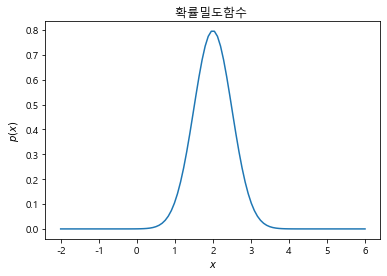

In [63]:
xx = np.linspace(-2, 6, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

- ÌôïÎ•† Î≥ÄÏàòÏùò ÌôïÎ•† Î∂ÑÌè¨ Í∞í : cdf Î°ú Í≥ÑÏÇ∞
- Î∂ÑÌè¨ Ìï®Ïàò : P(X <= x) Î•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®Ïàò

- cdf(x)

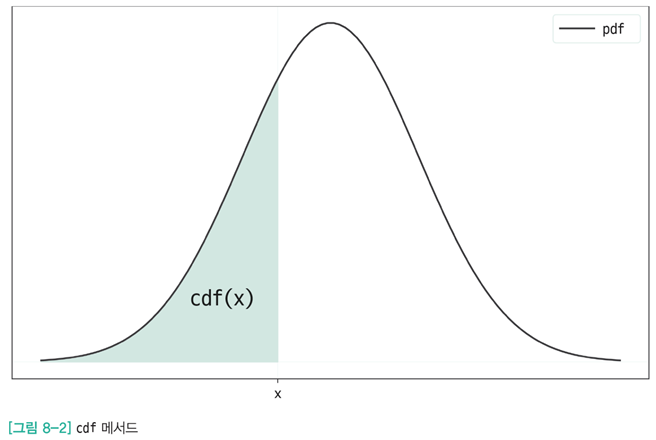

In [64]:
# XÍ∞Ä 1.7Î≥¥Îã§ ÏûëÏùÄ Í∞íÏù¥ ÎêòÎäî ÌôïÎ•†
rv.cdf(1.7)

0.27425311775007355

In [65]:
rv.cdf(np.inf)

1.0

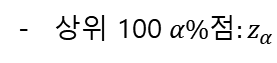


    - ùëÉ(ùëã‚â•x) = ùõºÎ•º ÎßåÏ°±ÌïòÎäî x
    

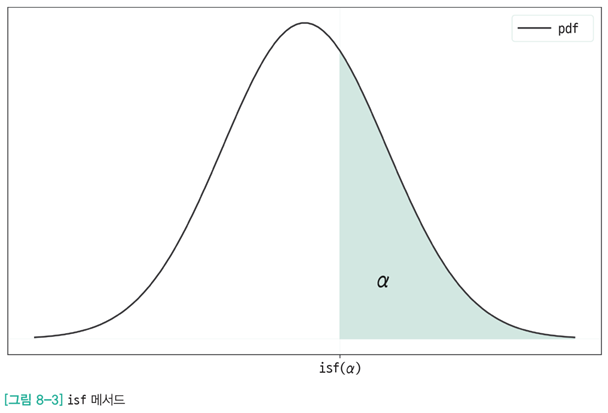


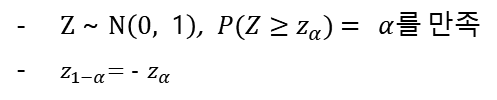

In [66]:
# ÏÉÅÏúÑ 30% Ï†ê
rv.isf(0.3)

2.2622002563540207

In [67]:
# ÏÉÅÏúÑ 70% Ï†ê(ÌïòÏúÑ 30% Ï†ê)
rv.isf(0.7)

1.7377997436459798

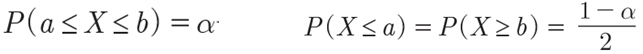



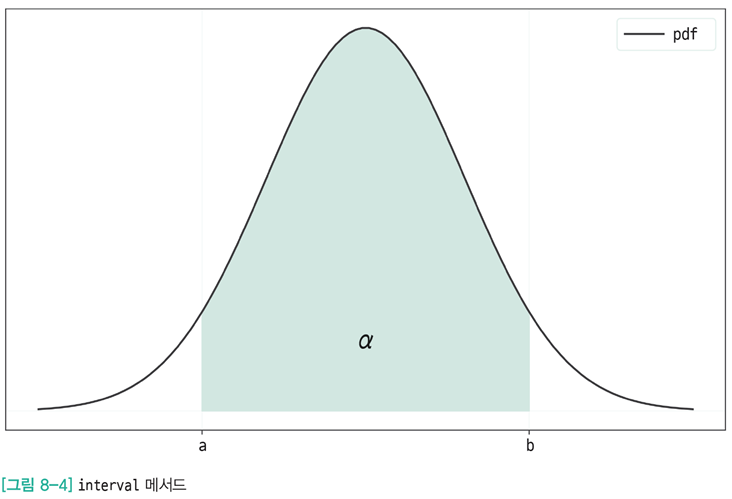



- Íµ¨Í∞Ñ [a, b]Îäî 100ùõº"%" Íµ¨Í∞Ñ


In [68]:
# 90% Íµ¨Í∞Ñ
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [69]:
# ÏôºÏ™ΩÍ≥º Ïò§Î•∏Ï™Ω  ÎÅùÏóê 5% Ïî© ÎÇ®Í∏∞ ÎïåÎ¨∏Ïóê ÏïÑÎûòÏôÄ Í∞ôÏù¥ Íµ¨Ìï† ÏàòÎèÑ ÏûáÎã§
rv.isf(0.95),rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

In [70]:
# ÌèâÍ∑†Ïù¥ 2Ïù¥Í≥† ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 0.5Ïù∏ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Îäî ÌôïÎ•†Î≥ÄÏàò rvÏóê ÏùòÌï¥
# ÌëúÌòÑÎêòÎäî 90%Íµ¨Í∞ÑÏùò ÌôïÎ•†ÏùÑ Íµ¨ÌïòÏãúÏò§
# 90%Íµ¨Í∞ÑÏùò Í≤ΩÍ≥ÑÏ†ê
rv.interval(0.9)
rv.cdf(2.822) - rv.cdf(1.178)

0.8998237976236567

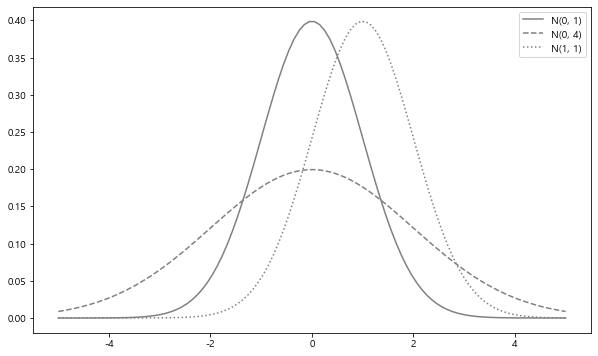

In [71]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

###  ÎÇ®Ïûê Í≥†Îì±ÌïôÏÉùÏùò ÌÇ§ ~ N(170, 5^2)

In [72]:
rv = stats.norm(170,5)

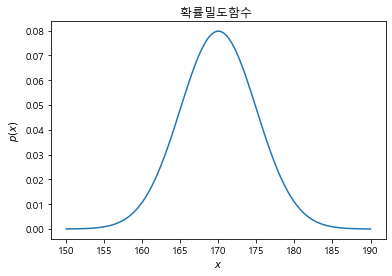

In [73]:
 # Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Îäî ÌôïÎ•†Î≥ÄÏàò rv

xx = np.linspace(150,190, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.title("ÌôïÎ•†Î∞ÄÎèÑÌï®Ïàò ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [74]:
pdf

array([2.677e-05, 3.686e-05, 5.043e-05, 6.854e-05, 9.256e-05, 1.242e-04,
       1.655e-04, 2.192e-04, 2.883e-04, 3.768e-04, 4.893e-04, 6.312e-04,
       8.090e-04, 1.030e-03, 1.303e-03, 1.638e-03, 2.045e-03, 2.536e-03,
       3.126e-03, 3.827e-03, 4.655e-03, 5.626e-03, 6.755e-03, 8.057e-03,
       9.548e-03, 1.124e-02, 1.315e-02, 1.528e-02, 1.764e-02, 2.023e-02,
       2.305e-02, 2.610e-02, 2.936e-02, 3.280e-02, 3.641e-02, 4.016e-02,
       4.401e-02, 4.791e-02, 5.181e-02, 5.567e-02, 5.943e-02, 6.302e-02,
       6.640e-02, 6.951e-02, 7.228e-02, 7.468e-02, 7.666e-02, 7.818e-02,
       7.920e-02, 7.972e-02, 7.972e-02, 7.920e-02, 7.818e-02, 7.666e-02,
       7.468e-02, 7.228e-02, 6.951e-02, 6.640e-02, 6.302e-02, 5.943e-02,
       5.567e-02, 5.181e-02, 4.791e-02, 4.401e-02, 4.016e-02, 3.641e-02,
       3.280e-02, 2.936e-02, 2.610e-02, 2.305e-02, 2.023e-02, 1.764e-02,
       1.528e-02, 1.315e-02, 1.124e-02, 9.548e-03, 8.057e-03, 6.755e-03,
       5.626e-03, 4.655e-03, 3.827e-03, 3.126e-03, 

In [75]:
# Ïö∞Ïó∞Ìûà ÎßåÎÇú ÎÇ®Ïûê Í≥†Îì±ÌïôÏÉùÏùò ÌÇ§Í∞Ä 165Ïù¥ÏÉÅ 175Ïù¥ÌïòÏùº ÌôïÎ•†ÏùÄ?
rv.cdf(175)-rv.cdf(165)

0.6826894921370859

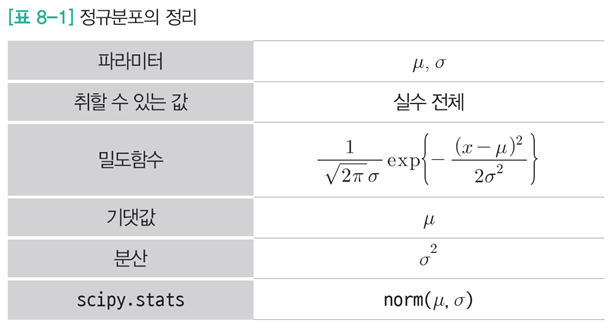

### AÎÜçÏû•ÏóêÏÑú Î¨¥Í≤åÍ∞Ä 203.81g ~ 302.9g ÏÇ¨Ïù¥Ïóê Ìï¥ÎãπÌïòÎäî ÏÇ¨Í≥ºÍ∞Ä ÏÑ†ÌÉùÎê† ÌôïÎ•†
- Îã® AÎÜçÏû•Ïùò ÏÇ¨Í≥ºÎäî ÌèâÍ∑†Î¨¥Í≤å 300g ÌëúÏ§ÄÌé∏Ï∞® 50gÏûÑ

In [76]:
# ÌèâÍ∑†Ïù¥ 300g Ïù¥Í≥† ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 50gÏù∏ Ï†ïÍ∑úÎ∂ÑÌè¨ Í∞ùÏ≤¥ Î≥ÄÏàò ÏÉùÏÑ±
rv = stats.norm(300,50)

In [77]:
# cdf Î©îÏÑúÎìú ÏÇ¨Ïö© ÌôïÎ•† Í≥ÑÏÇ∞
# Î¨¥Í≤åÍ∞Ä 203.81gÏùºÎïåÍπåÏßÄÏùò ÌôïÎ•†
rv.cdf(203.81)

0.027189828720993854

In [78]:
# Î¨¥Í≤åÍ∞Ä 302.9g Ïù¥ÌïòÏùº ÌôïÎ•†
rv.cdf(302.9)

0.5231256857358382

In [79]:
rv.cdf(302.9) - rv.cdf(203.81)

0.49593585701484433

## Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨

- ZÎäî Ï†ïÍ∑úÎ∂ÑÌè¨, ÏûêÏú†ÎèÑÎäî Ï†ïÍ∑úÎ∂ÑÌè¨Ïùò Í∞ØÏàò(n)
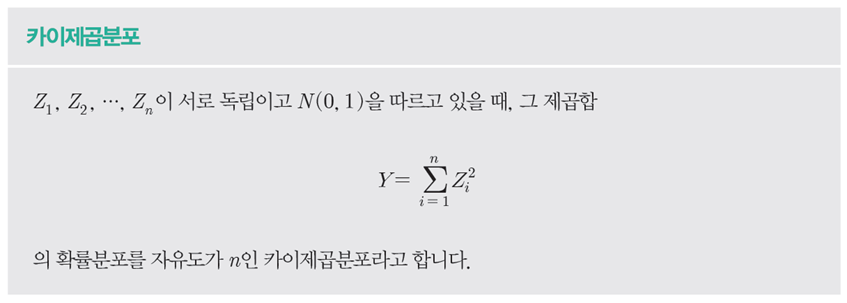
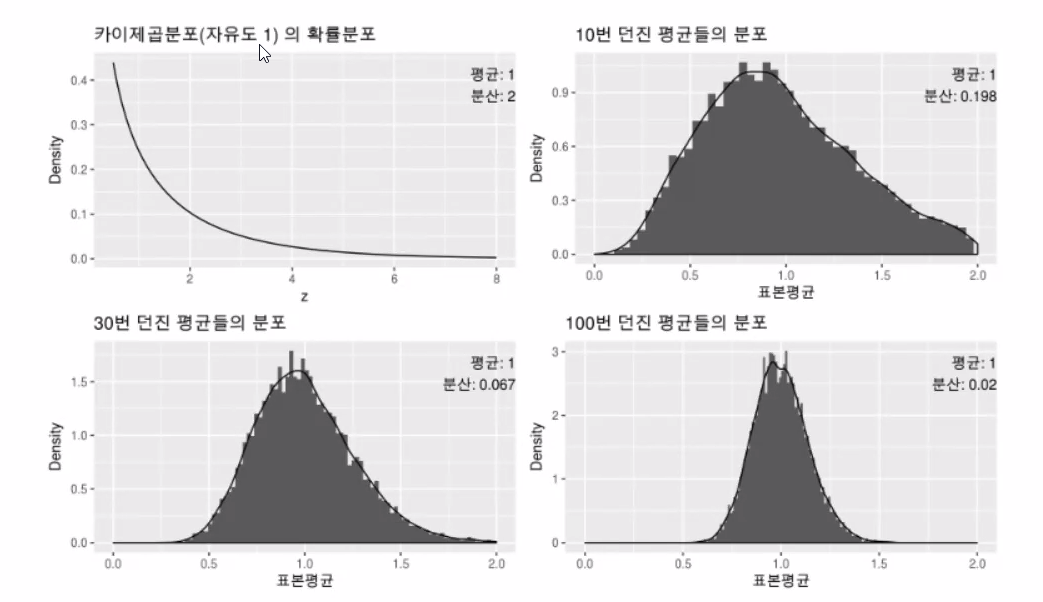

In [84]:
n = 10
rv = stats.norm(0,1)
sample_size = int(1e6)

In [85]:
# norm.rvs(size, random_state=seedÍ∞í Í≥†Ï†ï) 
# rvs : ÎÇúÏàò ÏÉùÏÑ±Ìï¥Ï£ºÎäî Ìï®Ïàò
# sample Ï∂îÏ∂ú(Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Îäî ÎÇúÏàò ÏÉùÏÑ±)
Zs_sample = rv.rvs((10,5))
Zs_sample




array([[-0.12 , -0.664,  0.854, -1.575,  0.108],
       [-0.447,  1.306,  0.747, -0.614,  1.524],
       [ 0.824, -0.506,  0.226, -0.449, -1.011],
       [ 1.903,  0.59 , -0.439, -0.817,  0.816],
       [-2.097, -0.809, -0.105, -0.662, -0.211],
       [ 0.673,  1.553,  0.016, -0.563,  1.09 ],
       [ 1.197,  0.282, -0.328,  1.643,  0.645],
       [-0.693, -0.62 , -1.542,  1.187, -0.512],
       [-3.07 , -0.816,  0.079, -0.171, -0.708],
       [-1.237,  0.033,  1.415,  0.573, -0.932]])

In [93]:
# ÌëúÏ§ÄÏ†ïÍ∑úÎ∂ÑÌè¨Î°úÎ∂ÄÌÑ∞ 10*100Îßå ÏÇ¨Ïù¥Ï¶àÎ°ú Î¨¥ÏûëÏúÑ Ï∂îÏ∂ú
Zs_sample = rv.rvs((n,sample_size))
# Zs_sample

chi2_sample = np.sum(Zs_sample**2,axis=0)

In [94]:
len(chi2_sample)

1000000

### Ïπ¥Ïù¥Ï†úÍ≥± Î∂ÑÌè¨Î•º Îî∞Î•¥Îäî ÌôïÎ•†Î≥ÄÏàò ÏÉùÏÑ± : stats.chi2(n)

In [95]:
n = 10
rv_true = stats.chi2(n)

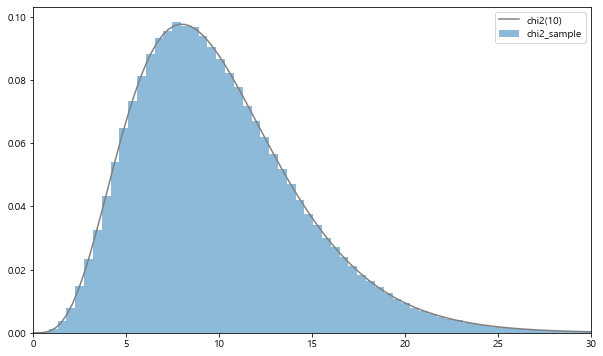

In [98]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
xs = np.linspace(0, 30, 100)

# sample Îç∞Ïù¥ÌÑ∞ Ïù¥Ïö© Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨ Í≥ÑÏÇ∞ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìïú ÌûàÏä§ÌÜ†Í∑∏Îû®
ax.hist(chi2_sample, bins=100, density=True,
      alpha=0.5, label='chi2_sample')


# Ïπ¥Ïù¥Ï†úÍ≥± Î∞ÄÎèÑ Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìïú Í∑∏ÎûòÌîÑ
ax.plot(xs,rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

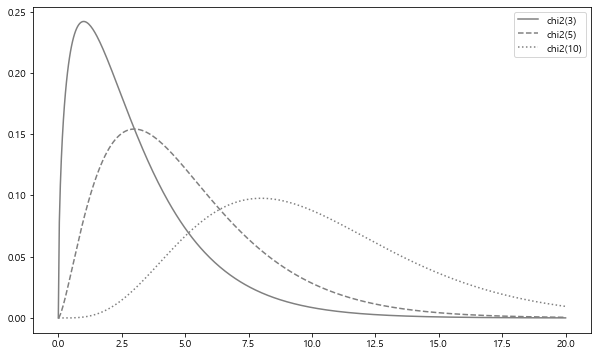

In [99]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# n(ÏûêÏú†ÎèÑ)Í∞íÏùÑÎ≥ÄÍ≤ΩÌï¥Í∞ÄÎ©¥ÏÑú Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

- Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨Îäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ï¢åÏ∏°Ïóê ÏπòÏö∞Ïπú Î∂ÑÌè¨Ïù∏Îç∞, ÏûêÏú†ÎèÑÍ∞Ä Ïª§ÏßàÏàòÎ°ù ÎåÄÏπ≠Ïùò Î∂ÑÌè¨Î°ú Ï†ëÍ∑ºÌïúÎã§.
    - nÏù¥ Ïª§ÏßÄÎ©¥ Î∂ÑÏÇ∞ÎèÑÍ∞Ä ÎÜíÏïÑÏ†∏ÏÑú Íº≠ÏßìÏ†êÏù¥ ÎÇÆÏïÑÏßê. Ï¶â Îç∞Ïù¥ÌÑ∞Ïùò ÏÇ∞Ìè¨Í∞Ä Ïª§ÏßÑÎã§

In [100]:
# ÏûêÏú†ÎèÑÍ∞Ä 5 ÏùºÎïå
rv = stats.chi2(5)
# ÏÉÅÏúÑ 5ÌîÑÎ°ú Ï†ê
print(rv.isf(0.05))
# ÏÉÅÏúÑ 95ÌîÑÎ°ú Ï†ê
print(rv.isf(0.95))

11.070497693516355
1.1454762260617697


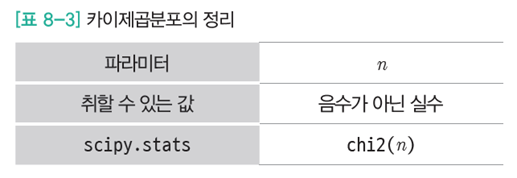

## tÎ∂ÑÌè¨ - Ï†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑú Î™®ÌèâÍ∑†Ïùò Íµ¨Í∞ÑÏ∂îÏ†ï Îì±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÌôïÎ•†Î∂ÑÌè¨

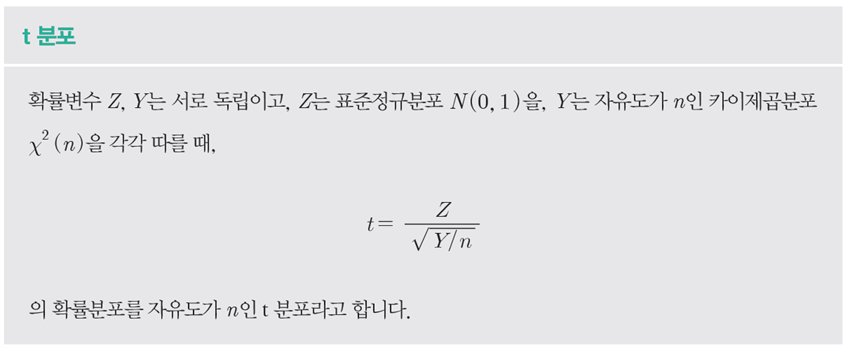

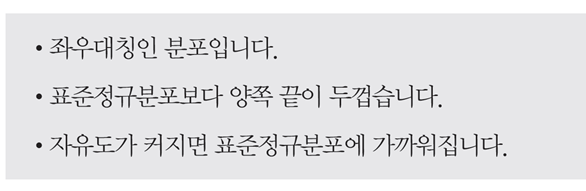

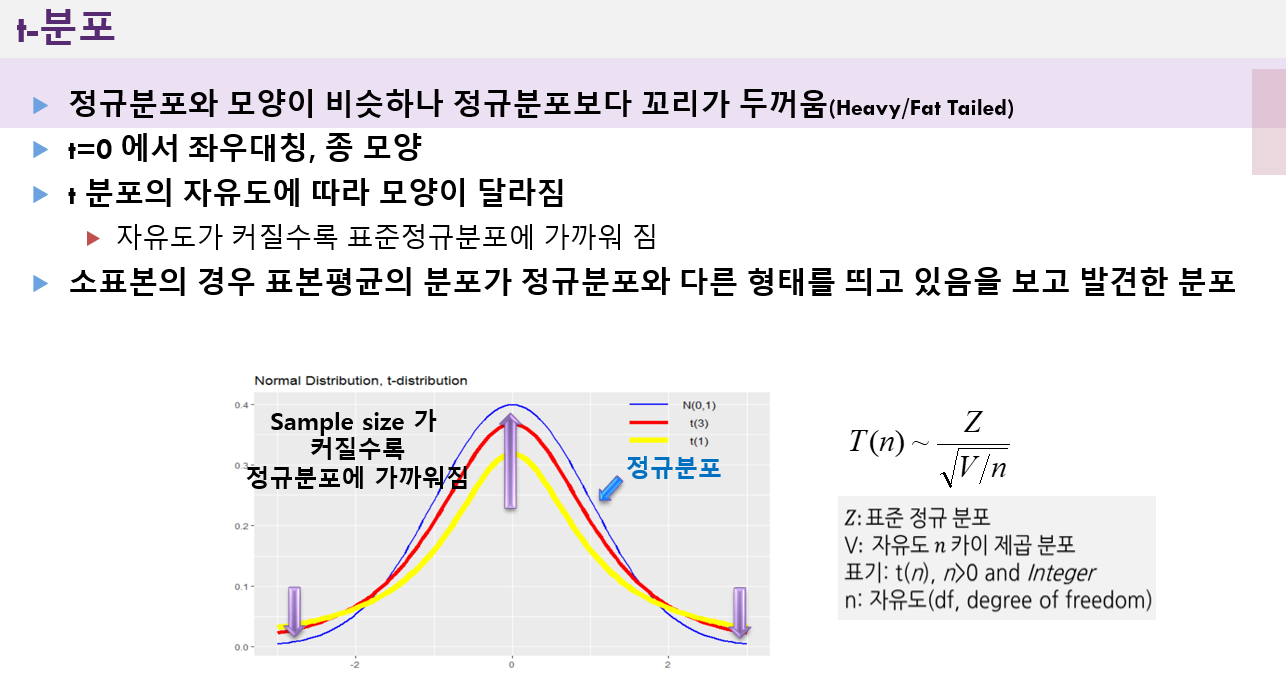

In [102]:
# Ï†ïÍ∑úÎ∂ÑÌè¨ÏôÄ Ïπ¥Ïù¥Î∂ÑÌè¨ ÏÇ¨Ïù¥Ïùò Í¥ÄÍ≥Ñ
n = 10
rv1 = stats.norm() # ÌëúÏ§Ä Ï†ïÍ∑úÎ∂ÑÌè¨ ÌôïÎ•†Î≥ÄÏàò ÏÉùÏÑ±
rv2 = stats.chi2(n) # ÏûêÏú†ÎèÑÍ∞Ä 10Ïùº Ïπ¥Ïù¥Ï†úÍ≥±Î∂ÑÌè¨ ÌôïÎ•†Î≥ÄÏàò ÏÉùÏÑ±

sample_size = int(1e6)
z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = z_sample / np.sqrt(chi2_sample/n)

In [104]:
z_sample
chi2_sample
t_sample

array([-0.103,  1.728, -1.129, ...,  1.67 ,  0.514,  0.762])

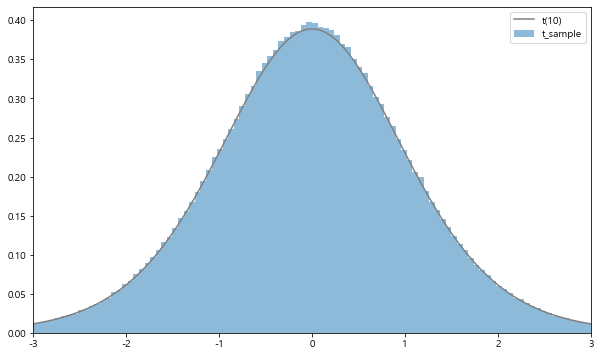

In [107]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# t ÌôïÎ•† Î≥ÄÏàòÏÉùÏÑ± 

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
# sampleÎ°ú ÏßÅÏ†ë Í≥ÑÏÇ∞Ìïú t Í≤∞Í≥ºÍ∞íÏùò ÌûàÏä§ÌÜ† Í∑∏Îû®
ax.hist(t_sample, bins=100, range=(-3,3),
       density=True, alpha=0.5, label='t_sample')

# ÌôïÎ•† Î∞ÄÎèÑ Ìï®Ïàò Ïù¥Ïö©Ìï¥ xÏùò ÎåÄÏùë ÌôïÎ•†Ìï®Ïàò Í∞í  Í≥ÑÏÇ∞
ax.plot(xs, rv.pdf(xs),label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

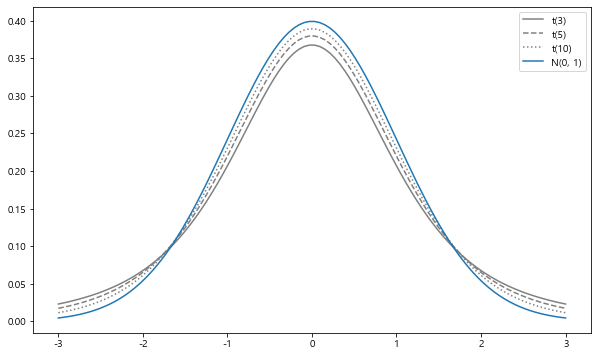

In [108]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()
# ÏûêÏú†ÎèÑÍ∞Ä Ïª§ÏßàÏàòÎ°ù Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπåÏõåÏßÑÎã§. (Íº≠ÏßìÏ†êÏù¥ ÎÜíÏïÑÏßÄÍ≥† ÏñëÏ™Ω ÎÅùÏù¥ 0Ïóê Í∞ÄÍπåÏõå ÏßÑÎã§.)

In [109]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575

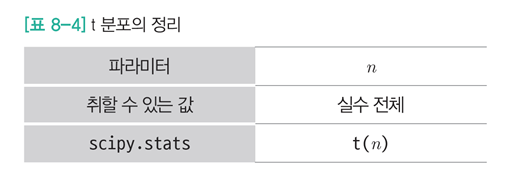

## FÎ∂ÑÌè¨-Î∂ÑÏÇ∞Î∂ÑÏÑù Îì±ÏóêÏÑú ÏÇ¨Ïö©ÎêòÎäî ÌôïÎ•†Î∂ÑÌè¨

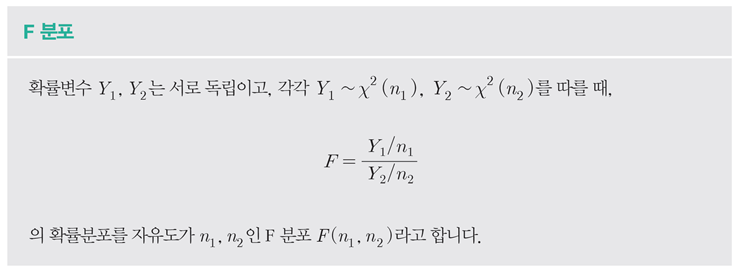

- ÏÑúÎ°ú ÎèÖÎ¶ΩÏù∏Îëê ÌôïÎ•†Î≥ÄÏàò Y1Í≥º Y2Í∞Ä Í∞ÅÍ∞Å ÏûêÏú†ÎèÑ n1, n2Ïù∏Ïπ¥Ïù¥Ï†úÍ≥± Î∂ÑÌè¨Î•º Îî∞Î•ºÎïå ÏÉàÎ°úÏö¥ ÌôïÎ•†Î≥ÄÏàò 
    - F = (Y1/n1)/(Y2/n2) Îäî F-Î∂ÑÌè¨Î•ºÎî∞Î•∏Îã§

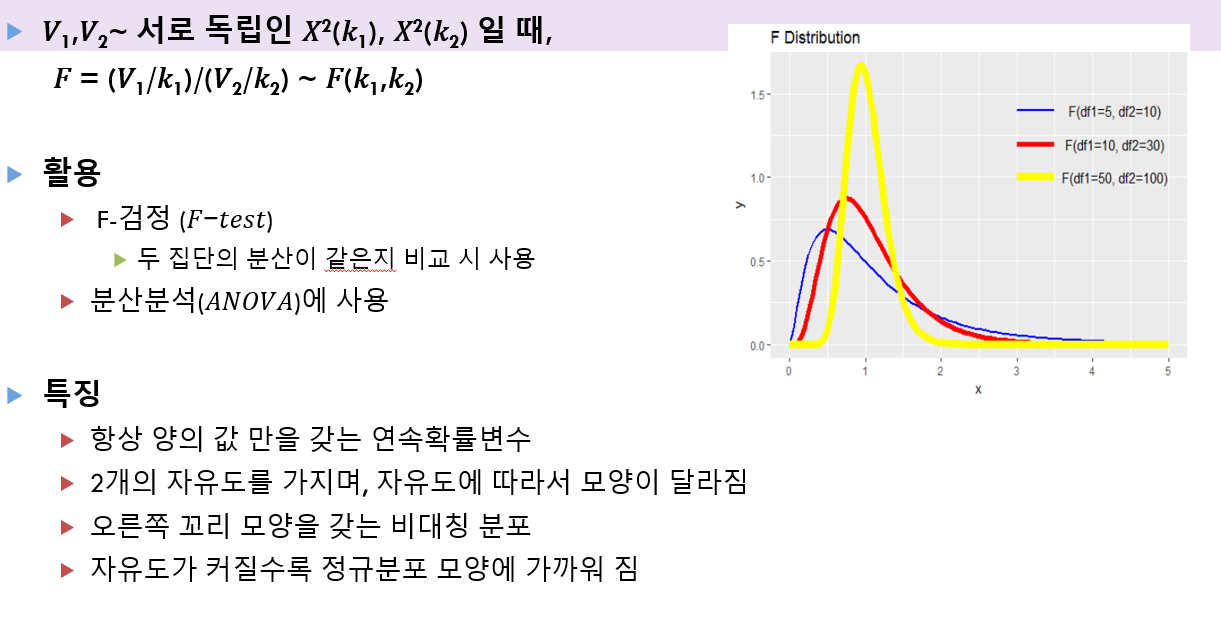

In [114]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)
f_sample

array([1.527, 1.376, 1.52 , ..., 1.675, 1.633, 2.243])

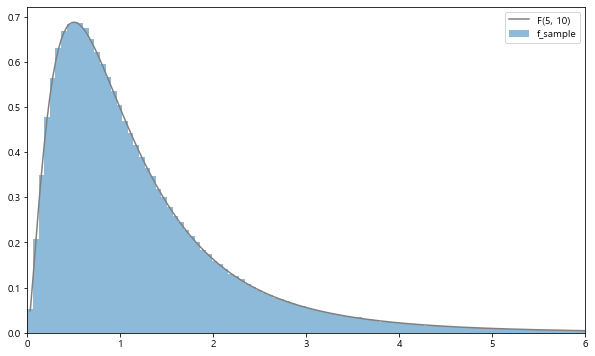

In [116]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample,bins=100,range=(0,6),
       density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs),label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

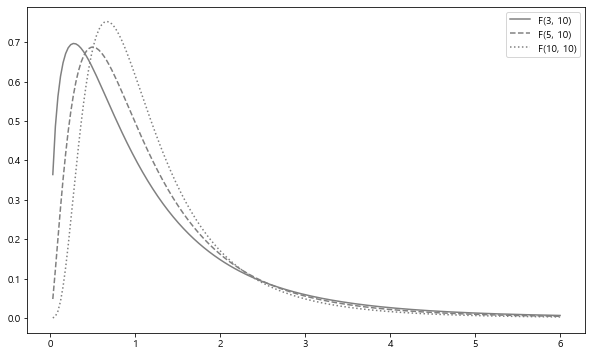

In [117]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()